<a href="https://colab.research.google.com/github/Nikund9/Stock-Price-Prediction-using-LSTM/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install seaborn

In [34]:
!pip install pandas_datareader

In [35]:
!pip install yfinance

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [38]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [39]:
company_list = [AAPL, GOOGL, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMAZON
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,AMAZON
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,AMAZON
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,AMAZON
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42612600,AMAZON


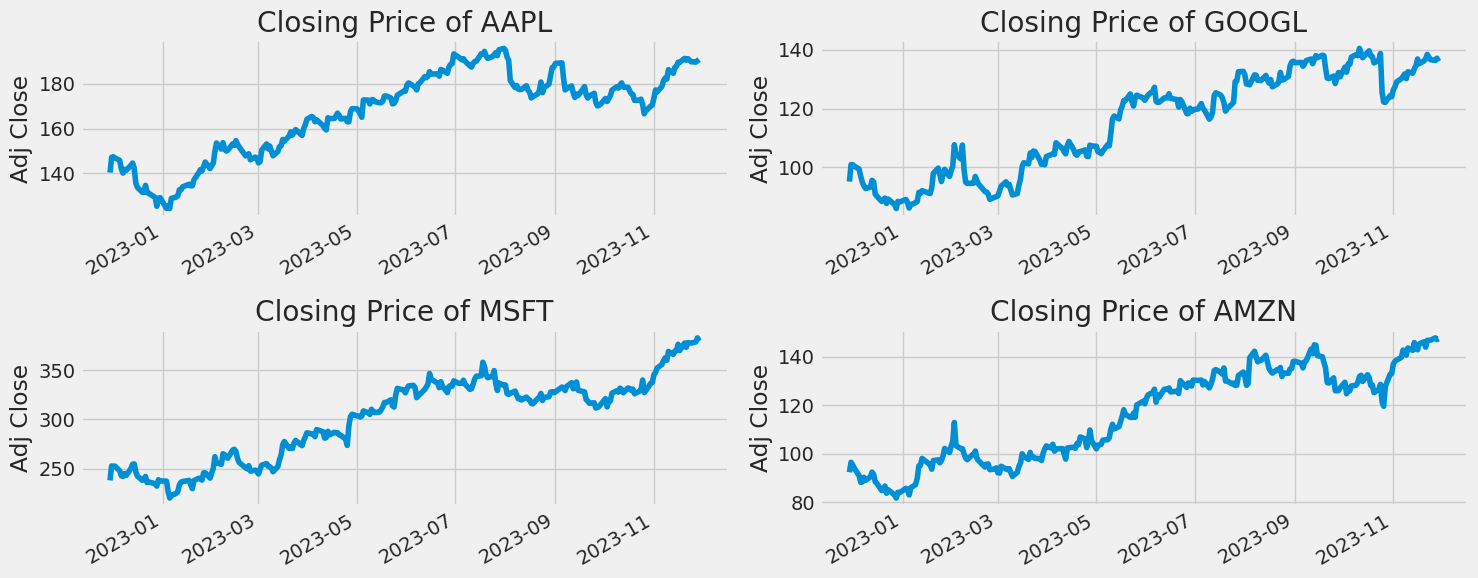

In [42]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

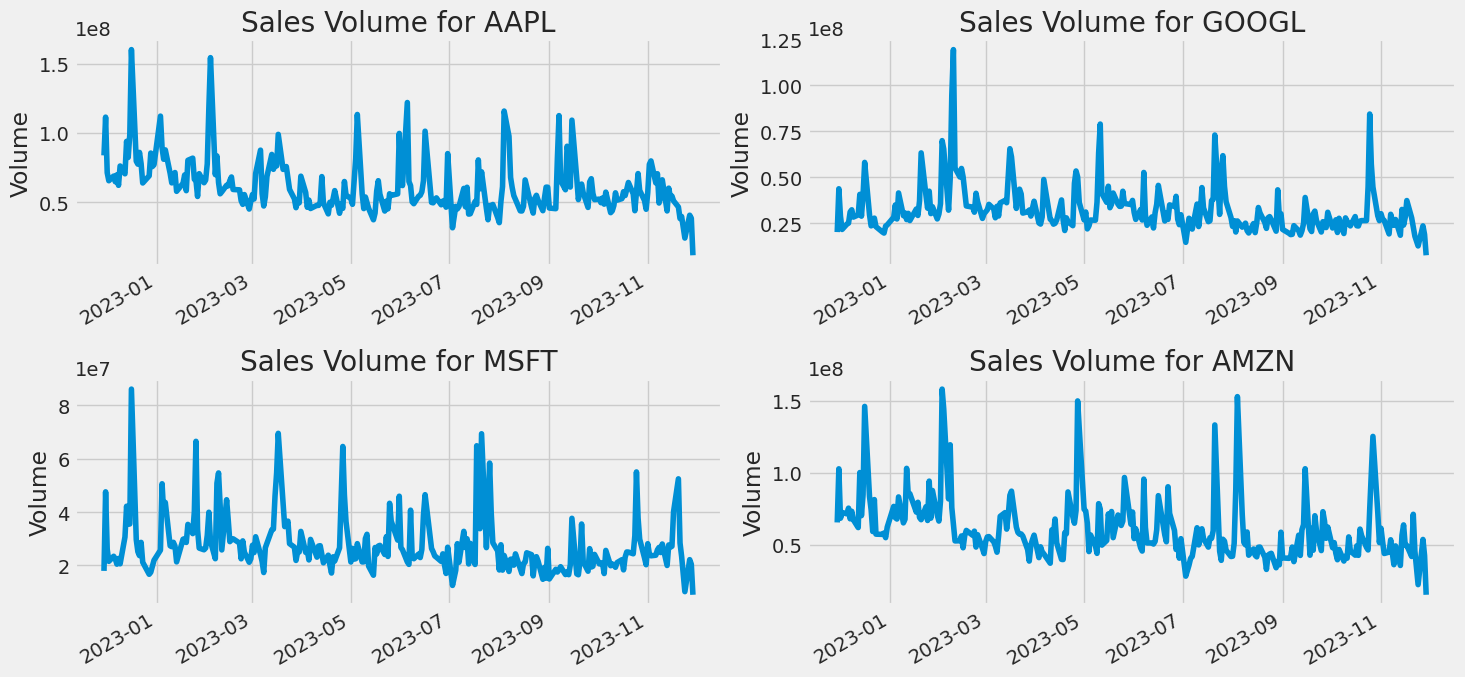

In [43]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [44]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

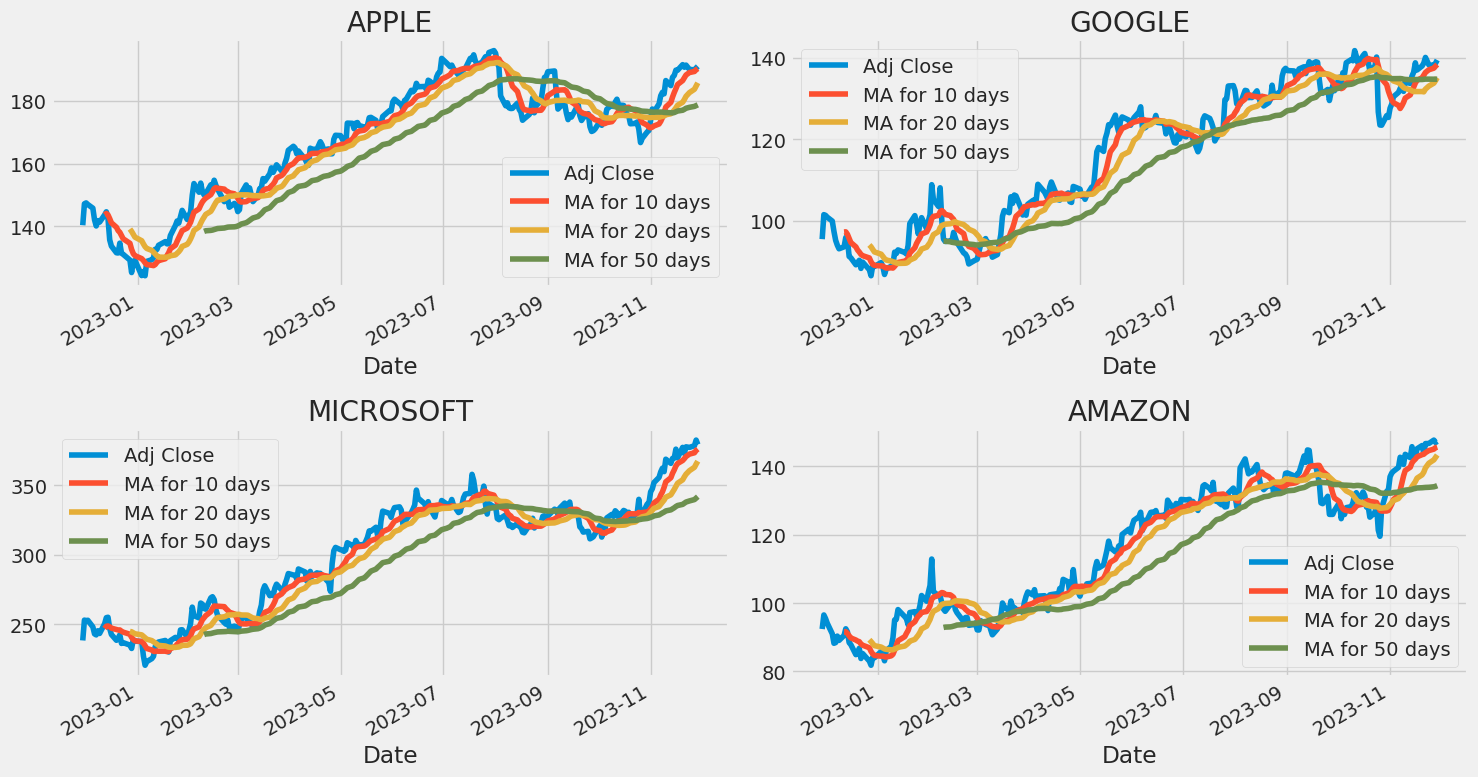

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


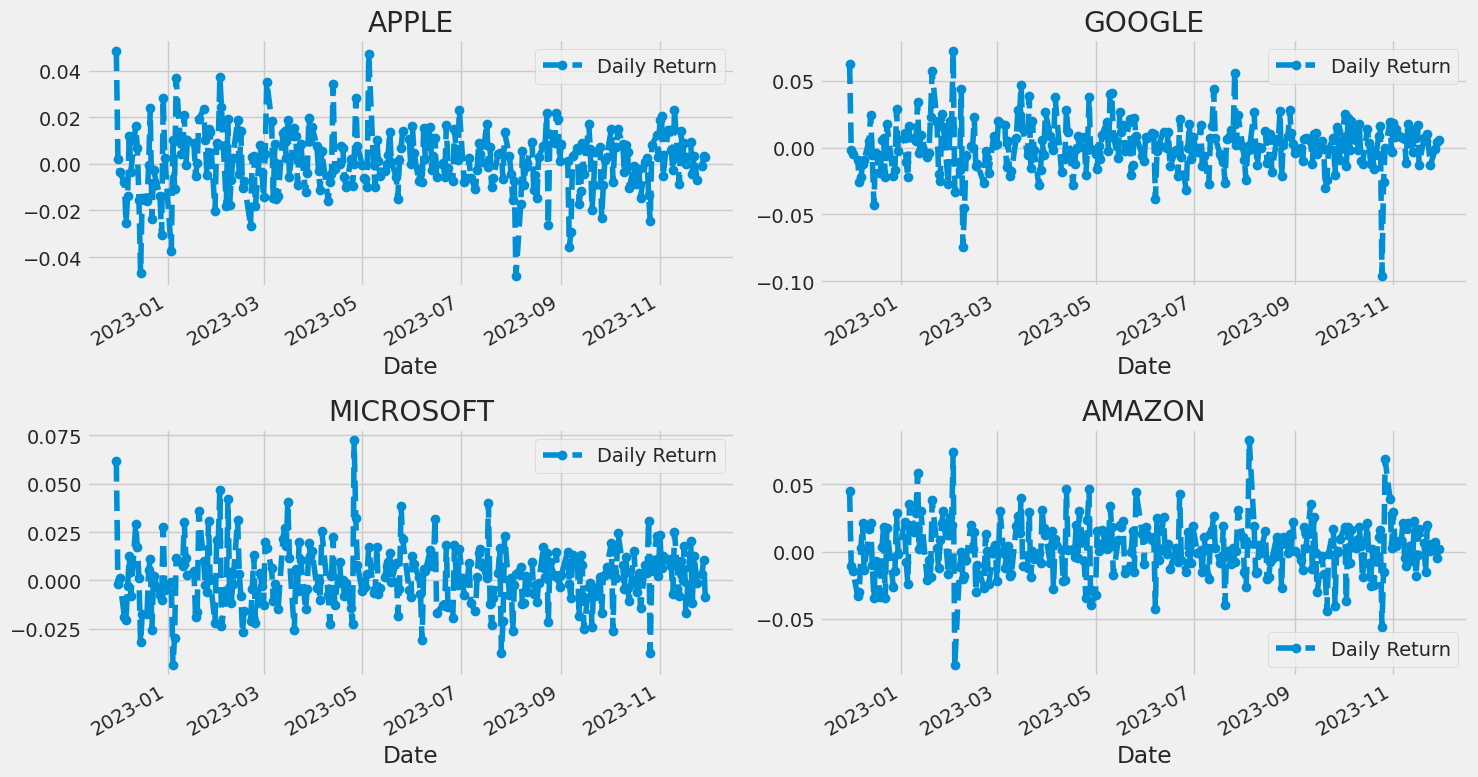

In [46]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [48]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty DataFrame to store the adjusted closing prices
closing_df = pd.DataFrame()

# Fetch closing prices for the tech stocks
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    closing_df[stock] = data['Adj Close']

# Display the first few rows of the DataFrame
print(closing_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  AAPL       GOOGL        MSFT       AMZN
Date                                                     
2022-11-29  140.385315   95.190002  238.217743  92.419998
2022-11-30  147.207169  100.989998  252.897583  96.540001
2022-12-01  147.485626  100.989998  252.451538  95.500000
2022-12-02  146.988403  100.440002  252.778641  94.129997
2022-12-05  145.814972   99.480003  248.000992  91.010002


In [49]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-11-29,NaN,NaN,NaN,NaN
2022-11-30,0.048594,0.060931,0.061624,0.044579
2022-12-01,0.001892,0.000000,-0.001764,-0.010773
2022-12-02,-0.003371,-0.005446,0.001296,-0.014346
2022-12-05,-0.007983,-0.009558,-0.018901,-0.033146


<Axes: >

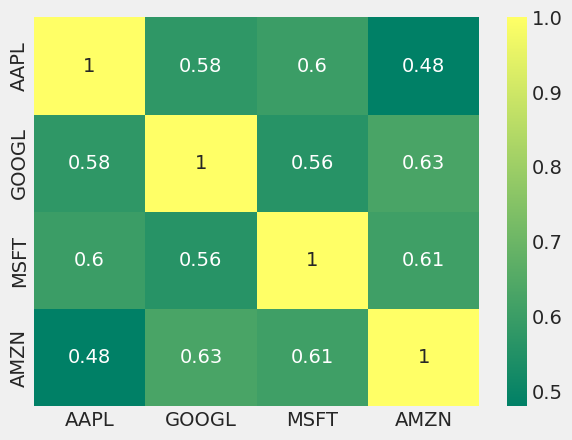

In [50]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: >

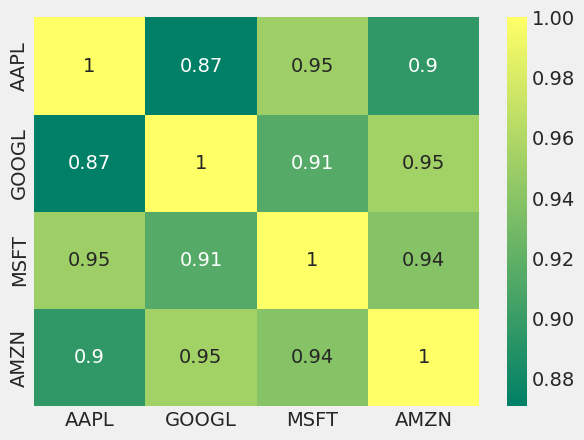

In [51]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [53]:
# # Get the stock quote
# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# # Show teh data
# df
import yfinance as yf
from datetime import datetime

# Get the stock quote for Apple (AAPL) using yfinance
start_date = '2012-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')  # Current date

# Fetch the stock data for AAPL using yfinance
df = yf.download('AAPL', start=start_date, end=end_date)

# Show the fetched data
print(df)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.449692   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.516598   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.655552   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.787856   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.767571   
...                ...         ...         ...         ...         ...   
2023-11-21  191.410004  191.520004  189.740005  190.639999  190.639999   
2023-11-22  191.490005  192.929993  190.830002  191.309998  191.309998   
2023-11-24  190.869995  190.899994  189.250000  189.970001  189.970001   
2023-11-27  189.919998  190.669998  188.899994  189.789993  189.789993   
2023-11-28  189.779999  191.080002  189.399

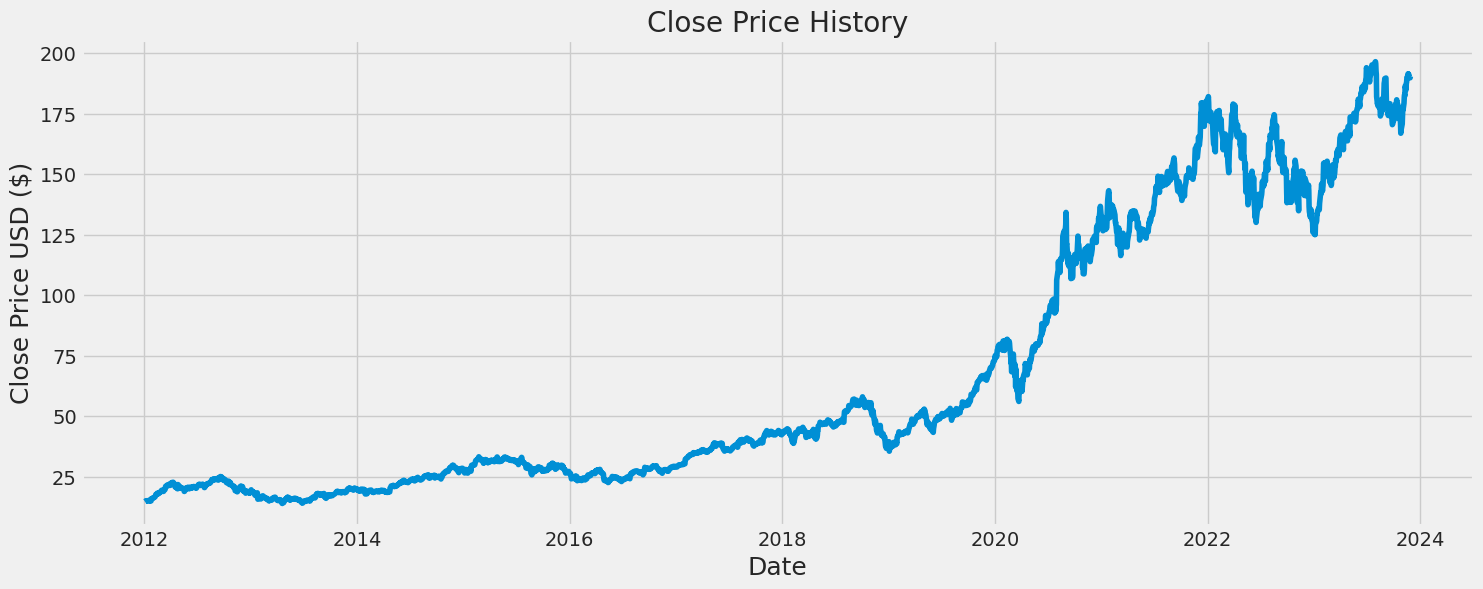

In [54]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [55]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2847

In [56]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.96449366],
       [0.96350733],
       [0.96684975]])

In [57]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2787/2787 [==============================] - 155s 55ms/step - loss: 0.0013


In [59]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


5/5 [==============================] - 1s 37ms/step


11.271546889021732

<ipython-input-60-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


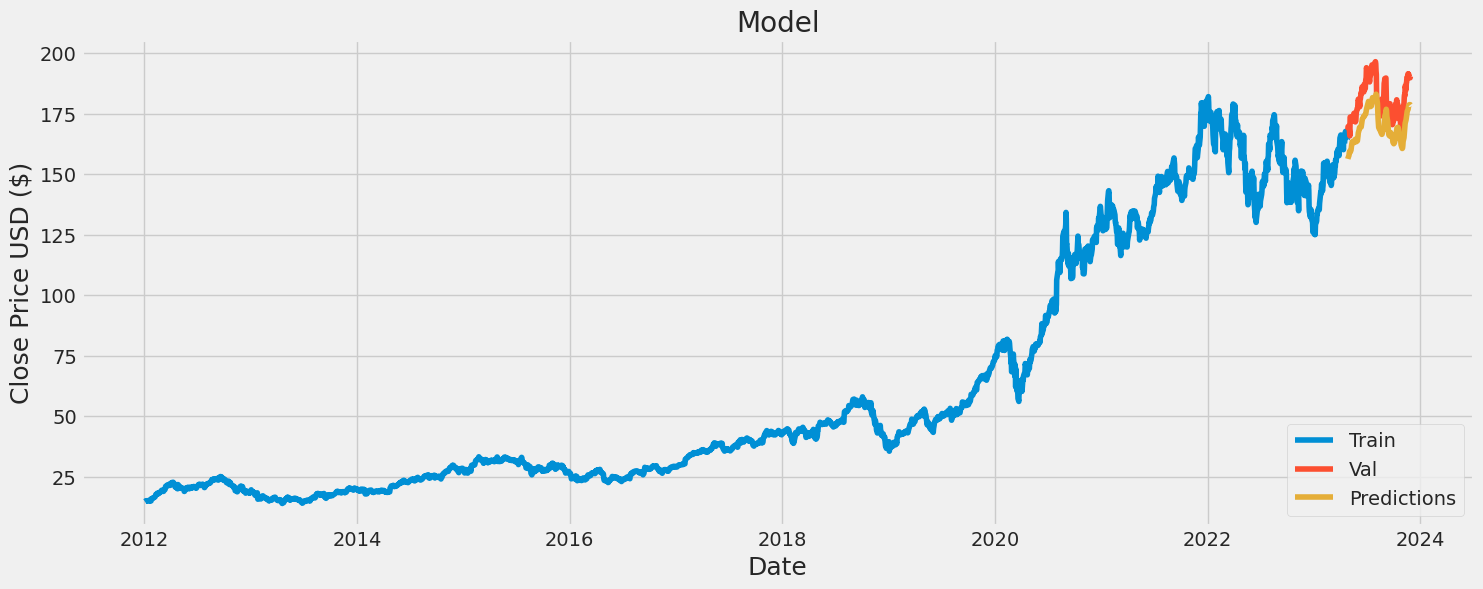

In [60]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-27,168.410004,156.273727
2023-04-28,169.679993,156.710175
2023-05-01,169.589996,157.727554
2023-05-02,168.539993,158.769073
2023-05-03,167.449997,159.395615
...,...,...
2023-11-21,190.639999,177.648056
2023-11-22,191.309998,178.219238
2023-11-24,189.970001,178.673798
